# k-NearestNeighbour classifier

In [ ]:
!pip install mglearn

First, we split our data into a training and a test set so we can evaluate general‐ ization performance.

In [3]:
import mglearn
from sklearn.model_selection import train_test_split 

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Next, we import and instantiate the classifier. This is when we can set parameters, like the `number of neighbors` to use.

In [5]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)

We fit the classifier using the training set. 

For `KNeighborsClassifier` this means storing the dataset, so we can compute neighbors during prediction

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Prediction: for each data point in the test set, it computes its nearest neighbors in the training set and finds the most common class among these.

In [8]:
print("Test-set predictions: {}".format(clf.predict(X_test)))

Test-set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can `score` prediction performances on the test-set

In [9]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


## Complexity and values of k

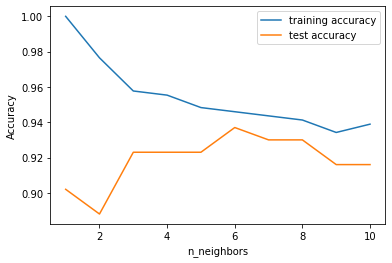

In [13]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []

# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # build the model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
  clf.fit(X_train, y_train)
  # record training set accuracy 
  training_accuracy.append(clf.score(X_train, y_train)) 
  # record generalization accuracy 
  test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# k-Neighbors Regression

In [15]:
from sklearn.neighbors import KNeighborsRegressor 

X, y = mglearn.datasets.make_wave(n_samples=40)
    
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets 
reg.fit(X_train, y_train)

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83
